# Resampling algorithms

## Jacknife

### Average estimator example

In [1]:
using Distributions
using CairoMakie
using Random

Random.seed!(13)

n = 15
x = rand(Normal(10, 3), n)
jacks = zeros(n)
for i = 1:n
    resample = deleteat!(copy(x), i)
    jacks[i] = mean(resample)
end

In [2]:
hist(jacks, bins = 10, normalization = :pdf, label = "jacknife samples",
    axis = (title = "Jacknife estimates", xlabel = "x"))
vlines!([10], label = "θ", color = :red)
axislegend(position = :lt)

Makie.Legend()

In [3]:
jack_mean = mean(jacks)
jack_se = sqrt(sum((jacks .- jack_mean) .^ 2) * (n-1) / n)
classical_se = sqrt(var(x) / n)

0.7890383774234041

### Correlation example

In [4]:
Random.seed!(17)

n = 35
X = MvNormal([10, 10], [1 0.5; 0.5 1])
x = rand(X, n)'

35×2 adjoint(::Matrix{Float64}) with eltype Float64:
  9.55057   8.35585
 11.481    10.12
 10.345    11.4371
 10.4292    9.15673
  9.25925   9.49212
  9.66386  10.2245
  9.58296   7.71879
  9.63939  10.118
  9.05937   9.97091
 10.8544    9.85327
  ⋮        
 10.0656   10.8171
  9.69727  10.5035
  9.69312   9.89236
 10.959    10.7798
  9.23568   9.03526
  7.86567   8.40249
  8.98806   9.79824
 12.4639   11.9186
  9.72184  10.8319

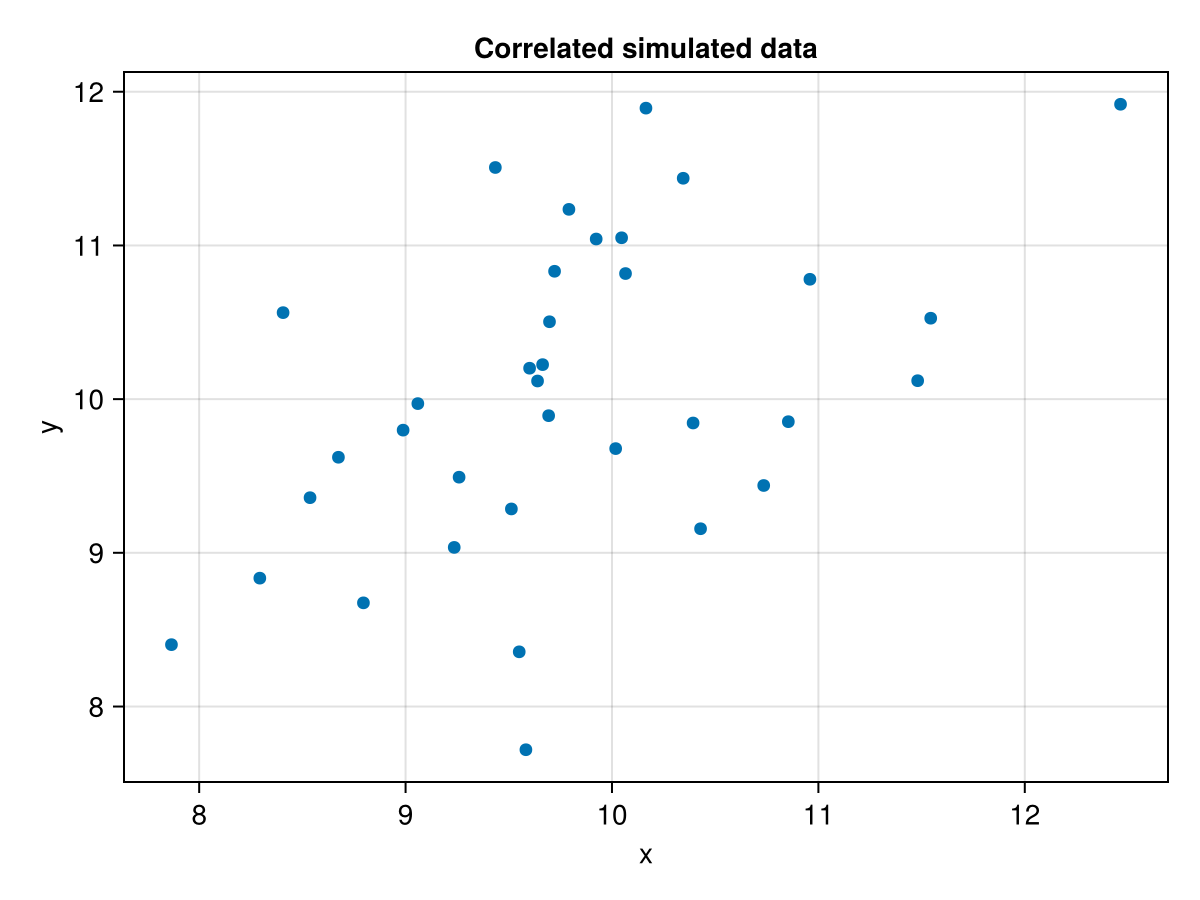

In [5]:
axis_args = (title = "Correlated simulated data", xlabel = "x", ylabel = "y")
scatter(x[:, 1], x[:, 2], axis = axis_args)

In [6]:
jacks = zeros(n)
for i = 1:n
    resample = x[1:n .∉ i, :]
    jacks[i] = cor(resample[:, 1], resample[:, 2])
end

In [7]:
hist(jacks, bins = 10, normalization = :pdf, label = "jacknife samples",
    strokewidth = 1, axis = (title = "Jacknife estimates", xlabel = "x"))
vlines!([0.5], label = "θ", color = :red)
axislegend(position = :lt)

Makie.Legend()

In [8]:
jack_mean = mean(jacks)
jack_se = sqrt(sum((jacks .- jack_mean) .^ 2) * (n-1) / n)

0.1348936689685314

## Bootstrap

### Non-parametric bootstrap

In [9]:
using Distributions
using CairoMakie
using Random

Random.seed!(13)

n = 15
λ = 100
x = rand(Poisson(λ), n)

15-element Vector{Int64}:
  98
 111
  89
 117
  86
  92
 107
 106
  87
 106
 101
 114
 105
 110
 101

In [10]:
statistic = mean
estimate = statistic(x)

102.0

In [11]:
m = 1000
bootstraps = zeros(m)
for i = 1:m
    resample = sample(x, n)
    bootstraps[i] = statistic(resample)
end

In [12]:
hist(bootstraps, bins = 10, normalization = :pdf, label = "bootstraps samples",
    strokewidth = 1, axis = (title = "Bootstrap estimates", xlabel = "x"))
vlines!([λ], label = "λ", color = :red)
axislegend(position = :lt)

Makie.Legend()

In [13]:
boot_bias = mean(bootstraps) - estimate

-0.06819999999997606

In [14]:
α = 0.05
quantile(bootstraps, [α/2, 1 - α/2])

2-element Vector{Float64}:
  97.26666666666667
 106.20333333333333

### Parametric bootstrap

In [15]:
using Distributions
using CairoMakie
using Random

Random.seed!(13)

n = 15
λ = 100
x = rand(Poisson(λ), n)

15-element Vector{Int64}:
  98
 111
  89
 117
  86
  92
 107
 106
  87
 106
 101
 114
 105
 110
 101

In [16]:
statistic = mean
estimate = statistic(x)

102.0

In [17]:
m = 1000
bootstraps = zeros(m)
for i = 1:m
    resample = rand(Poisson(estimate), n)
    bootstraps[i] = statistic(resample)
end

In [18]:
hist(bootstraps, bins = 10, normalization = :pdf, label = "bootstraps samples",
    strokewidth = 1, axis = (title = "Bootstrap estimates", xlabel = "x"))
vlines!([λ], label = "λ", color = :red)
axislegend(position = :rt)

Makie.Legend()

In [19]:
estimate = mean(x)
boot_bias = mean(bootstraps) - estimate

-0.04466666666667152

In [20]:
α = 0.05
quantile(bootstraps, [α/2, 1 - α/2])

2-element Vector{Float64}:
  97.06666666666666
 106.735

### Regression bootstrap

In [21]:
using Distributions
using CairoMakie
using Random

Random.seed!(13)

n = 50
x = randn(n)
y = 10 .+ 3x + rand(Normal(0, 2), n)

50-element Vector{Float64}:
  8.456651085547048
 11.31318140171334
  8.654253819849867
  6.702863712288582
  8.157796444647191
 14.148116584146369
  9.908213600168324
 13.061037024136446
 11.084939557151642
 16.08284689684122
  ⋮
  8.965679417539278
 14.393276054911812
 13.851056356385957
 10.11372903282492
 13.34550897555986
 11.37726745363613
 15.517607824408486
  6.8901525888268065
  8.270837035138712

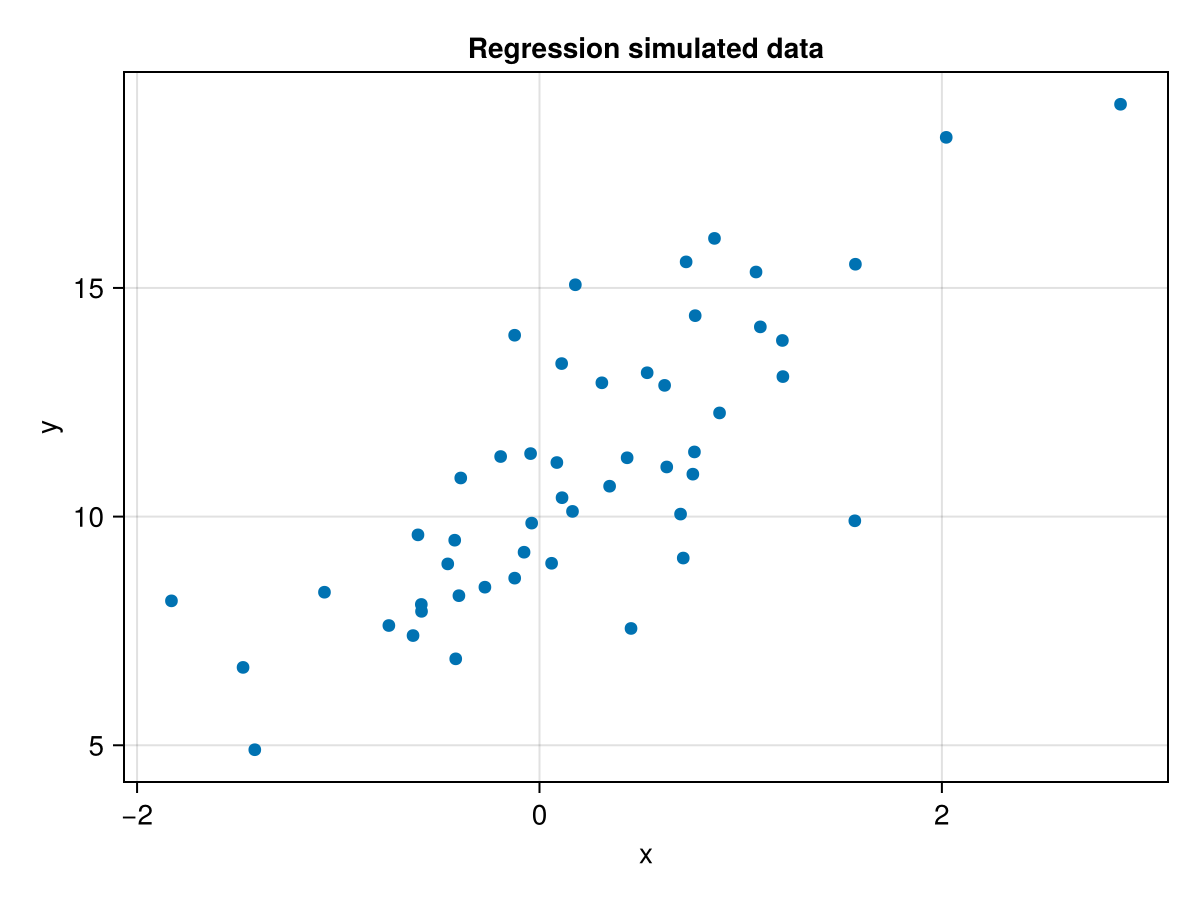

In [22]:
axis_args = (title = "Regression simulated data", xlabel = "x", ylabel = "y")
scatter(x, y, axis = axis_args)

In [23]:
function regcoeff(x, y)
    b = sum((x .- mean(x)) .* (y .- mean(y))) / sum((x .- mean(x)).^2)
    a = mean(y) - b * mean(x)
    return [a, b]
end

estimate = regcoeff(x, y)

2-element Vector{Float64}:
 10.46873087659655
  2.741013622164035

In [24]:
m = 1000
bootstraps = zeros(m, 2)
for i = 1:m
    ind_resample = sample(1:n, n)
    bootstraps[i, :] = regcoeff(x[ind_resample], y[ind_resample])
end

In [25]:
scatter(bootstraps[:, 1], bootstraps[:, 2], label = "bootstrap estimates",
    axis = (title = "Regression simulated data", xlabel = "β₀", ylabel = "β₁"))
scatter!([10], [3], color = :red, label = "true value")
axislegend()

Makie.Legend()

In [26]:
boot_bias = mean(bootstraps, dims = 1)' - estimate

2×1 Matrix{Float64}:
 -0.009743694822443416
  0.0068374189083955095

In [27]:
α = 0.05
quantile(bootstraps[:, 1], [α/2, 1 - α/2])

2-element Vector{Float64}:
  9.930983284118922
 10.982776231402074

## Permutation tests

### Comparison of means

In [28]:
using Distributions
using CairoMakie
using Random

Random.seed!(13)

n1, n2 = 15, 25
x = rand(Normal(10, 3), n1)
y = rand(Normal(15, 4), n2)
z = vcat(x, y)

40-element Vector{Float64}:
  9.186227676352363
  9.420899547036642
  9.630470321813599
  5.580201679155769
  4.51261605288691
 13.293076392772385
 14.701767991773487
 13.629185496314518
  8.751274767107477
  8.7986865438037
  ⋮
 16.495426602123658
 12.281785167100656
 13.206831695774465
 15.600944785496104
 25.040694271226325
 11.857457307809808
 15.071857903433598
 15.396611195530879
 13.743476763380198

In [29]:
estimate = mean(x) - mean(y)

-4.7383674538053775

In [30]:
m = 1000
bootstraps = zeros(m)
for i = 1:m
    x_ind = sample(1:(n1+n2), n1)
    y_ind = setdiff(1:(n1+n2), x_ind)
    boot_x = z[x_ind]
    boot_y = z[y_ind]
    bootstraps[i] = mean(boot_x) - mean(boot_y)
end

In [31]:
hist(bootstraps, bins = 10, normalization = :pdf, label = "permutation under H₀",
    strokewidth = 1, axis = (title = "Permutation", xlabel = "x"))
vlines!([estimate], label = "observed statistic", color = :red)
axislegend(position = :rt)

Makie.Legend()

In [32]:
pvalue = 2 * (sum(bootstraps .< estimate) / m)

0.0

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*